# Frequencies of words in novels: a Data Science pipeline

<img src="img/moby-dick.jpg" width="350">

In this code-along session, you will use some basic Natural Language Processing to plot the most frequently occurring words in the novel _Moby Dick_. In doing so, you'll also see the efficacy of thinking in terms of the following Data Science pipeline with a constant regard for process:
1. State your question;
2. Get your data;
3. Wrangle your data to answer your question;
4. Answer your question;
5. Present your solution so that others can understand it.

For example, what would the following word frequency distribution be from?

<img src="img/d-x.png" width="350">

## Pre-steps

Follow the instructions in the README.md to get your system set up and ready to go.

## 1. State your question

What are the most frequent words in the novel _Moby Dick_ and how often do they occur?

## 2. Get your data

Your raw data is the text of Melville's novel _Moby Dick_. We can find it at [Project Gutenberg](https://www.gutenberg.org/). 

**TO DO:** Head there, find _Moby Dick_ and then store the relevant url in your Python namespace:

In [3]:
# Store url
# url = 'https://www.gutenberg.org/files/2701/2701-h/2701-h.htm'
url = 'https://www.gutenberg.org/files/42671/42671-h/42671-h.htm'


You're going to use [`requests`](http://docs.python-requests.org/en/master/) to get the web data.
You can find out more in DataCamp's [Importing Data in Python (Part 2) course](https://www.datacamp.com/courses/importing-data-in-python-part-2). 

<img src="img/requests.png" width="200">

According to the `requests` package website:

> Requests is one of the most downloaded Python packages of all time, pulling in over 13,000,000 downloads every month. All the cool kids are doing it!

You'll be making a `GET` request from the website, which means you're _getting_ data from it. `requests` make this easy with its `get` function. 

**TO DO:** Make the request here and check the object type returned.

In [4]:
# Import `requests`
import requests

# Make the request and check object type
r = requests.get(url)
type(r)


requests.models.Response

This is a `Response` object. You can see in the [`requests` kickstart guide](http://docs.python-requests.org/en/master/user/quickstart/) that a `Response` object has an attribute `text` that allows you to get the HTML from it! 

**TO DO:** Get the HTML and print the HTML to check it out:

In [5]:
# Extract HTML from Response object and print
html = r.text
#print(html)

OK! This HTML is not quite what you want. However, it does _contain_ what you want: the text of _Moby Dick_. What you need to do now is _wrangle_ this HTML to extract the novel. 

**Recap:** 

* you have now scraped the web to get _Moby Dick_ from Project Gutenberg.

**Up next:** it's time for you to parse the html and extract the text of the novel.

## 3. Wrangle your data to answer the question

### Part 1: getting the text from the HTML


Here you'll use the package [`BeautifulSoup`](https://www.crummy.com/software/BeautifulSoup/). The package website says:

<img src="img/bs4.png" width="550">


**TO DO:** Create a `BeautifulSoup` object from the HTML.

In [6]:
# Import BeautifulSoup from bs4
from bs4 import BeautifulSoup

# Create a BeautifulSoup object from the HTML
soup = BeautifulSoup(html, "html5lib")
type(soup)

bs4.BeautifulSoup

From these soup objects, you can extract all types of interesting information about the website you're scraping, such as title:

In [7]:
# Get soup title
soup.title

<title>The Project Gutenberg eBook of Pride and Prejudice, by Jane Austen</title>

Or the title as a string:

In [8]:
# Get soup title as string
soup.title.string

'The Project Gutenberg eBook of Pride and Prejudice, by Jane Austen'

Or all URLs found within a page’s < a > tags (hyperlinks):

In [9]:
# Get hyperlinks from soup and check out first 10
soup.findAll('a')[:8]

[<a href="http://www.gutenberg.org">www.gutenberg.org</a>,
 <a href="http://www.pgdp.net">http://www.pgdp.net</a>,
 <a href="http://archive.org">http://archive.org</a>,
 <a href="http://archive.org/stream/novelstextbasedo02austuoft#page/n23/mode/2up">
       http://archive.org/stream/novelstextbasedo02austuoft#page/n23/mode/2up</a>,
 <a href="images/illus1big.jpg"><img alt="" src="images/illus1.jpg"/></a>,
 <a href="images/illus2big.jpg"><img alt="" src="images/illus2.jpg"/></a>,
 <a href="images/illus3big.jpg"><img alt="" src="images/illus3.jpg"/></a>,
 <a href="images/illus4big.jpg"><img alt="" src="images/illus4.jpg"/></a>]

What you want to do is to extract the text from the `soup` and there's a souper helpful `.get_text()` method precisely for this. 

**TO DO:** Get the text, print it out and have a look at it. Is it what you want?

In [10]:
# Get the text out of the soup and print it
text = soup.get_text()
# print(text)

Notice that this is now nearly what you want. You'll need to do a bit more work.

**Recap:** 

* you have scraped the web to get _Moby Dick_ from Project Gutenberg;
* you have also now parsed the html and extracted the text of the novel.

**Up next:** you'll use Natural Language Processing, tokenization and regular expressions to extract the list of words in _Moby Dick_.

### Part 2: Extract words from your text using NLP

You'll now use `nltk`, the Natural Language Toolkit, to

1. Tokenize the text (fancy term for splitting into tokens, such as words);
2. Remove stopwords (words such as 'a' and 'the' that occur a great deal in ~ nearly all English language texts.


#### Step 1: Tokenize

You want to tokenize your text, that is, split it into a list a words.

To do this, you're going to use a powerful tool called _regular expressions_, or _regex_.

* Example: you have the string 'peter piper picked a peck of pickled peppers' and you want to extract from the list of _all_ words in it that start with a 'p'. 

The regular expression that matches all words beginning with 'p' is 'p\w+'. Let's unpack this: 

* the 'p' at the beginning of the regular expression means that you'll only match sequences of characters that start with a 'p';
* the '\w' is a special character that will match any alphanumeric A-Z, a-z, 0-9, along with underscores;
* The '+' tells you that the previous character in the regex can appear as many times as you want in strings that you're trying to match. This means that '\w+' will match arbitrary sequences of alphanumeric characters and underscores.

**You'll now use the built-in Python package `re` to extract all words beginning with 'p' from the sentence 'peter piper picked a peck of pickled peppers' as a warm-up.**



In [11]:
# Import regex package
import re


# Define sentence
sentence = 'peter piper pick a peck of pickled peppers'

# Define regex
ps = 'p\w+'


# Find all words in sentence that match the regex and print them
re.findall(ps, sentence)

['peter', 'piper', 'pick', 'peck', 'pickled', 'peppers']

This looks pretty good. Now, if 'p\w+' is the regex that matches words beginning with 'p', what's the regex that matches all words?

**It's your job to now do this for our toy Peter Piper sentence above.**

In [12]:
# Find all words and print them
re.findall('\w+', sentence)

['peter', 'piper', 'pick', 'a', 'peck', 'of', 'pickled', 'peppers']

**TO DO:** use regex to get all the words in _Moby Dick_:

In [13]:
# Find all words in Moby Dick and print several
tokens = re.findall('\w+', text)
tokens[:8]

['The', 'Project', 'Gutenberg', 'eBook', 'of', 'Pride', 'and', 'Prejudice']

**Recap:** 

* you have scraped the web to get _Moby Dick_ from Project Gutenberg;
* you have parsed the html and extracted the text of the novel;
* you have used tokenization and regular expressions to extract the list of words in _Moby Dick_.

**Up next:** extract the list of words in _Moby Dick_ using `nltk`, the Natural Language Toolkit.

Go get it!

In [14]:
# Import RegexpTokenizer from nltk.tokenize
from nltk.tokenize import RegexpTokenizer

# Create tokenizer
tokenizer = RegexpTokenizer('\w+')


# Create tokens
tokens = tokenizer.tokenize(text)
tokens[:8]

['The', 'Project', 'Gutenberg', 'eBook', 'of', 'Pride', 'and', 'Prejudice']

**TO DO:** Create a list containing all the words in _Moby Dick_ such that all words contain only lower case letters. You'll find the string method `.lower()` handy:

In [15]:
# Initialize new list
words = []

# Loop through list tokens and make lower case
for word in tokens:
    words.append(word.lower())


# Print several items from list as sanity check
words[:8]


['the', 'project', 'gutenberg', 'ebook', 'of', 'pride', 'and', 'prejudice']

**Recap:** 

* you have scraped the web to get _Moby Dick_ from Project Gutenberg;
* you have parsed the html and extracted the text of the novel;
* you have used tokenization and regular expressions to extract the list of words in _Moby Dick_.

**Up next:** remove common words such as 'a' and 'the' from the list of words.

#### Step 2: Remove stop words

It is common practice to remove words that appear alot in the English language such as 'the', 'of' and 'a' (known as stopwords) because they're not so interesting. For more on all of these techniques, check out our [Natural Language Processing Fundamentals in Python course](https://www.datacamp.com/courses/nlp-fundamentals-in-python). 

The package `nltk` has a list of stopwords in English which you'll now store as `sw` and print the first several elements of:

In [16]:
# Import nltk
import nltk


# Get English stopwords and print some of them
sw = nltk.corpus.stopwords.words('english')
sw[:5]

['i', 'me', 'my', 'myself', 'we']

You want the list of all words in `words` that are *not* in `sw`. One way to get this list is to loop over all elements of `words` and add the to a new list if they are *not* in `sw`:

In [17]:
# Initialize new list
words_ns = []


# Add to words_ns all words that are in words but not in sw
for word in words:
    if word not in sw:
        words_ns.append(word)



# Print several list items as sanity check
words_ns[:5]

['project', 'gutenberg', 'ebook', 'pride', 'prejudice']

**Recap:** 

* you have scraped the web to get _Moby Dick_ from Project Gutenberg;
* you have parsed the html and extracted the text of the novel;
* you have used tokenization and regular expressions to extract the list of words in _Moby Dick_.
* you have removed common words such as 'a' and 'the' from the list of words.

**Up next:** plot the word frequency distribution of words in _Moby Dick_.

## 4. Answer your question



Our question was 'What are the most frequent words in the novel Moby Dick and how often do they occur?' 

You can now plot a frequency distribution of words in _Moby Dick_ in two line of code using `nltk`. To do this,

* Create a frequency distribution object using the function `nltk.FreqDist()`;
* Using the plot method of the resulting object.

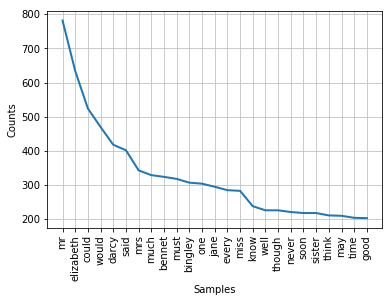

In [18]:
# nltk builds upon matplotlib
#Import datavis libraries
import matplotlib.pyplot as plt
import seaborn as sns   # plotting library


# Figures inline and set visualization style
%matplotlib inline
# sns.set()

# Create freq dist and plot
freqdist1 = nltk.FreqDist(words_ns)
freqdist1.plot(25)

**Recap:** 

* you have scraped the web to get _Moby Dick_ from Project Gutenberg;
* you have parsed the html and extracted the text of the novel;
* you have used tokenization and regular expressions to extract the list of words in _Moby Dick_.
* you have removed common words such as 'a' and 'the' from the list of words.
* you have plotted the word frequency distribution of words in _Moby Dick_.

**Up next:** adding more stopwords.

### Add more stop words

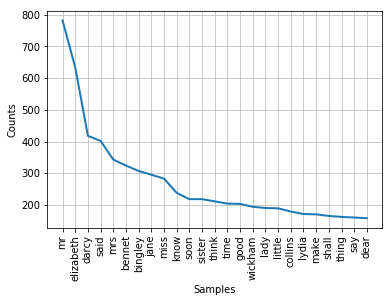

In [19]:
# Import stopwords from sklearn
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS

# Add sklearn stopwords to words_sw
sw = set(sw + list(ENGLISH_STOP_WORDS))

# Initialize new list
words_ns = []

# Add to words_ns all words that are in words but not in sw
for word in words:
    if word not in sw:
        words_ns.append(word)



# Print several list items as sanity check
words_ns[:8]

# Create freq dist and plot
freqdist2 = nltk.FreqDist(words_ns)
freqdist2.plot(25)

## 5. Present your solution so that others can understand it.

The cool thing is that, in using `nltk` to answer our question, we actually already presented our solution in a manner that can be communicated to other: a frequency distribution plot! You can read off the most common words, along with their frequency. For example, 'whale' is the most common word in the novel (go figure), excepting stopwords, and it occurs a whopping >1200 times! 

___
## BONUS MATERIAL

As you have seen that there are lots of novels on Project Gutenberg we can make these word frequency distributions of, it makes sense to write your own function that does all of this:

In [20]:
def plot_word_freq(url):
    """Takes a url(from Project Gutenberg) and plots a word distribution"""
    # Make the request and check object type
    r = requests.get(url)
    # Extract HTML from Response object and print
    html = r.text
    # Create a BeautifulSoup object from the HTML
    soup = BeautifulSoup(html, "html5lib")
    # Get the text out of the soup and print it
    text = soup.get_text()
    # Create tokenizer
    tokenizer = RegexpTokenizer('\w+')
    # Create tokens
    tokens = tokenizer.tokenize(text)
    # Initialize new list
    words = []
    # Loop through list tokens and make lower case
    for word in tokens:
        words.append(word.lower())
    # Get English stopwords and print some of them
    sw = nltk.corpus.stopwords.words('english')
    # Initialize new list
    words_ns = []
    # Add to words_ns all words that are in words but not in sw
    for word in words:
        if word not in sw:
            words_ns.append(word)
    # Create freq dist and plot
    freqdist1 = nltk.FreqDist(words_ns)
    freqdist1.plot(25)

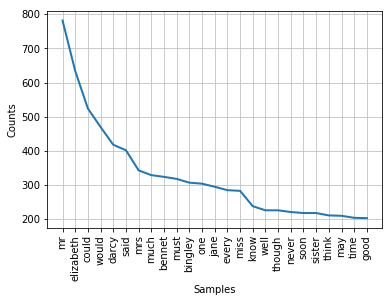

In [21]:
plot_word_freq("https://www.gutenberg.org/files/42671/42671-h/42671-h.htm")

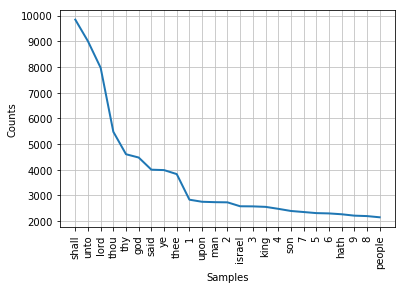

In [22]:
plot_word_freq("https://www.gutenberg.org/files/10/10-h/10-h.htm")